In [82]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
import warnings
import numpy as np
import pandas as pd
import networkx as nx

%matplotlib inline
ox.__version__

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [83]:
nodes = gpd.read_file("data/ego/nodes.shp")
edges = gpd.read_file("data/ego/edges.shp")

In [84]:
TEST = "healthcare"

In [85]:
nodes = nodes.set_index("osmid")
edges = edges.set_index(['u', 'v', 'key'])

G = ox.utils_graph.graph_from_gdfs(nodes, edges)

In [86]:
rmv_list = []
for node, data in G.nodes(data=True):
    covrd = data.get(TEST, False)
    if covrd:
        rmv_list.append(node)
print(len(rmv_list))

2565


In [87]:
print(f"before {len(G.nodes())}")
G.remove_nodes_from(rmv_list)
print(f"after {len(G.nodes())}")

before 5462
after 2897


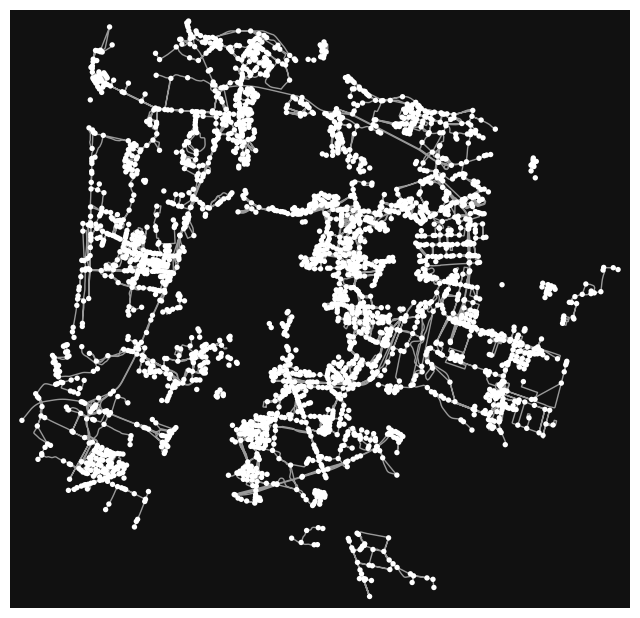

In [88]:
fig, ax = ox.plot_graph(G)

In [89]:
rmv_list2 = []
for c in sorted(nx.connected_components(ox.utils_graph.get_undirected(G)), key=len, reverse=True):
    if len(c) <= 20:
        rmv_list2.extend(list(c))
G.remove_nodes_from(rmv_list2)
print(f"after {len(G.nodes())}")

after 2724


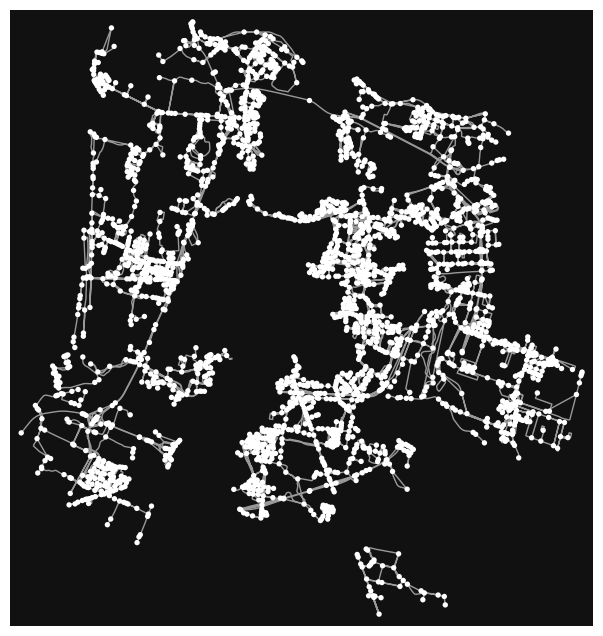

In [90]:
fig, ax = ox.plot_graph(G)

In [91]:

communities = nx.community.louvain_communities(G, weight="time") # list of sets (communities)
#mapping = dict(zip(sorted(communities),count()))
nodes = G.nodes()
#colors = [mapping[G.nodes[n]['group']] for n in nodes]

color_map = {}
for i, community in enumerate(communities):
    color = f'C{i}'
    for node in community:
        color_map[node] = color

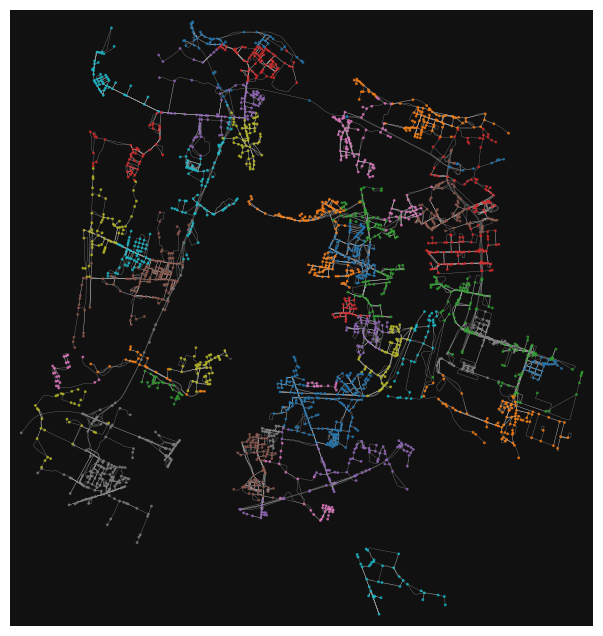

In [92]:
fig, ax = ox.plot_graph(
    G,
    node_color=[color_map[node] for node in G.nodes()],
    node_size=4,
    node_alpha=0.8,
    edge_linewidth=0.2,
    edge_color="#999999",
)

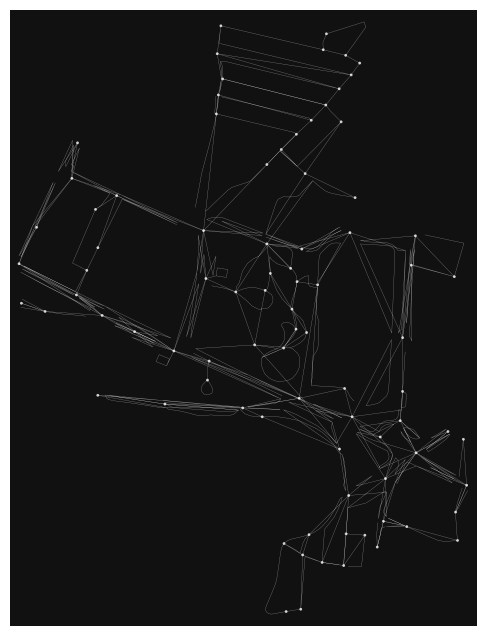

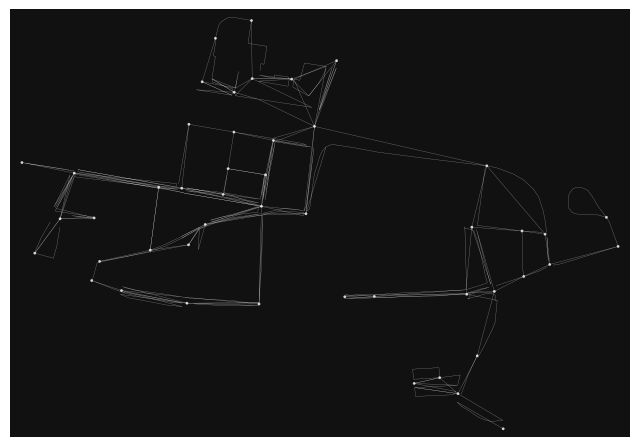

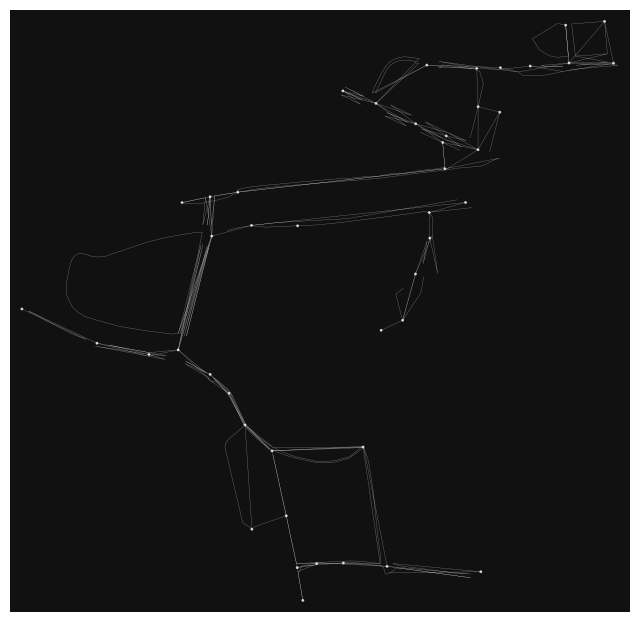

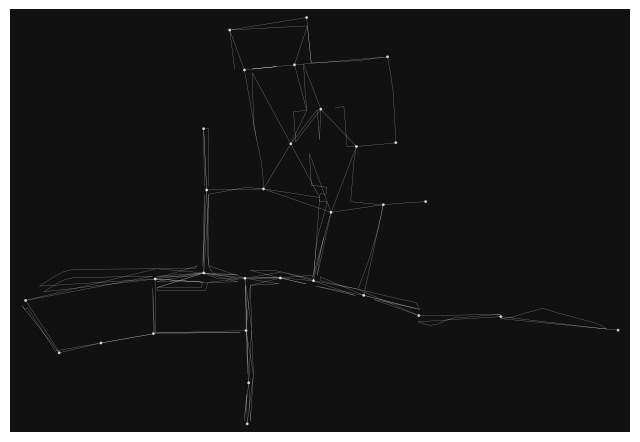

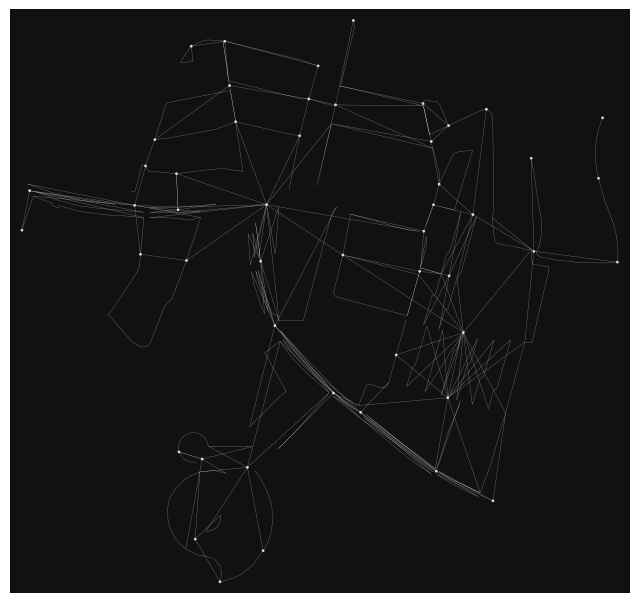

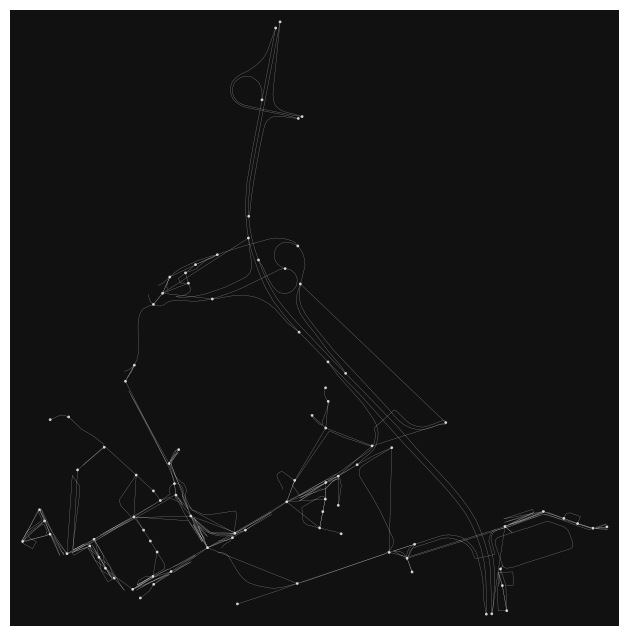

In [93]:
count = 0
for c in communities:
    sub = G.subgraph(c)
    fig, ax = ox.plot_graph(
        sub,
        node_size=4,
        node_alpha=0.8,
        edge_linewidth=0.2,
        edge_color="#999999",
    )

    if count == 5:
        break
    count += 1